<a href="https://colab.research.google.com/github/benjaminbenteke/test-live-coding/blob/master/Benjamin_Benteke_LogRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [25]:
##### WRITE YOUR CODE HERE #####
path= '/content/diabetes.csv'
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [26]:
##### WRITE YOUR CODE HERE #####
data.head()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [27]:
##### WRITE YOUR CODE HERE #####
data.dtypes
#### END CODE ####

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [28]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [29]:
##### WRITE YOUR CODE HERE #####
def scale(data):
  data  = data - data.mean()
  data = data/data.std()
  return data
#### END CODE ####

Question 5: Scale your features, except the target. 

In [30]:
##### WRITE YOUR CODE HERE #####
data.iloc[:,:-1]=scale(data.iloc[:,:-1])
data
#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487,0
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677,0
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580,0
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [31]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [32]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, \theta \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{pred}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [58]:
class logistic_regression:
  def __init__(self, x_test, y_test, num_iters, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters= num_iters
    self.threshold= threshold
    self.tolerance= tolerance
    self.lr= lr
    self.theta= None
    self.x_test= x_test
    self.y_test= y_test
    self.cost_history= []
    self.cost_history_test= []
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new= np.concatenate((np.ones((len(x),1)), x), axis = 1)
    return x_new
    #### END CODE ####

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    z= x@theta
    return 1/(1 + np.exp(-z))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = x.shape[0]
    y_hat = self.sigmoid(x, self.theta)
    Cost = -np.sum(y_true*np.log(y_hat)+(1-y_true)*np.log(1-y_hat))/n  
    return Cost
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed

    self.x_test= self.add_ones(self.x_test) # Add ones to x
    self.y_test= self.y_test.reshape(-1, 1) # reshape y. This is optional, do it if needed

    self.theta= np.zeros((x.shape[1], 1))# Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x, self.theta) # using sigmoid function 

      # Gradient of cross-entropy
      grad= -x.T@(y - y_pred)
      grad= grad.reshape(-1, 1) # Reshape, if it is needed

      # update rules
      self.theta= self.theta - self.lr*grad
      # Compute the training loss
      self.cost_history.append(self.cross_entropy(x, y))      # Convergence criteria:
      self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test))
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
   pass
  
    
  def predict_proba(self, x):
    pass
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_history)), self.cost_history, 'r', linewidth = "2", label= 'Train Loss')
    plt.plot(np.arange(len(self.cost_history_test)), self.cost_history_test, 'b', linewidth = "2", label= 'Validation Loss')
    plt.legend()
    plt.show()
    #### END CODE ####

In [59]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(x_test,y_test,num_iters=10000)

In [60]:
%%time
model.fit(x_train, y_train)

cost for 100 iteration : 0.6362373605032056
cost for 200 iteration : 0.5988470249186555
cost for 300 iteration : 0.5731266601190667
cost for 400 iteration : 0.55465961189875
cost for 500 iteration : 0.540917013898821
cost for 600 iteration : 0.5303898928558937
cost for 700 iteration : 0.5221361975391887
cost for 800 iteration : 0.5155423018805118
cost for 900 iteration : 0.5101931110081556
cost for 1000 iteration : 0.5057984298137365
cost for 1100 iteration : 0.5021495355459177
cost for 1200 iteration : 0.49909259434535147
cost for 1300 iteration : 0.49651182432058555
cost for 1400 iteration : 0.49431849661589616
cost for 1500 iteration : 0.4924435467133997
cost for 1600 iteration : 0.49083248470438723
cost for 1700 iteration : 0.48944180933120623
cost for 1800 iteration : 0.4882364300560568
cost for 1900 iteration : 0.4871877801040583
cost for 2000 iteration : 0.48627241286696055
cost for 2100 iteration : 0.485470942723045
cost for 2200 iteration : 0.48476723539985783
cost for 2300 it

In [57]:
pred= model.predict(x_test)

In [ ]:
pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Predict Proba
print(model.predict_proba(x_test))

[[0.0621]
 [0.1436]
 [0.1677]
 [0.0565]
 [0.6866]
 [0.5908]
 [0.2401]
 [0.2425]
 [0.0385]
 [0.1886]
 [0.0447]
 [0.3099]
 [0.6544]
 [0.0178]
 [0.6413]
 [0.0529]
 [0.3717]
 [0.494 ]
 [0.3416]
 [0.0737]
 [0.271 ]
 [0.4752]
 [0.4347]
 [0.192 ]
 [0.2511]
 [0.804 ]
 [0.1115]
 [0.4247]
 [0.4134]
 [0.207 ]
 [0.0308]
 [0.9211]
 [0.0705]
 [0.4055]
 [0.0706]
 [0.4636]
 [0.7279]
 [0.4458]
 [0.1158]
 [0.9547]
 [0.0936]
 [0.2659]
 [0.8375]
 [0.9143]
 [0.2087]
 [0.0789]
 [0.2372]
 [0.7176]
 [0.4112]
 [0.3573]
 [0.2549]
 [0.677 ]
 [0.7355]
 [0.0229]
 [0.4227]
 [0.1864]
 [0.304 ]
 [0.7764]
 [0.143 ]
 [0.9133]
 [0.9494]
 [0.3878]
 [0.1288]
 [0.0699]
 [0.1692]
 [0.0835]
 [0.0611]
 [0.0546]
 [0.3898]
 [0.5423]
 [0.5947]
 [0.5072]
 [0.0057]
 [0.0165]
 [0.1788]
 [0.0876]
 [0.9268]
 [0.8461]
 [0.2378]
 [0.8072]
 [0.5071]
 [0.0742]
 [0.0381]
 [0.4086]
 [0.2687]
 [0.8279]
 [0.7836]
 [0.2676]
 [0.1783]
 [0.0875]
 [0.0528]
 [0.0772]
 [0.1533]
 [0.2506]
 [0.1097]
 [0.0481]
 [0.8506]
 [0.3916]
 [0.0769]
 [0.7196]


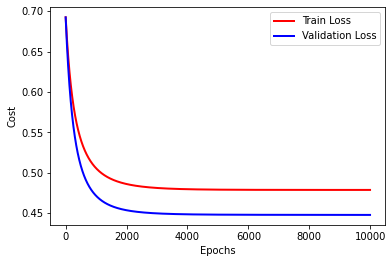

In [61]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [ ]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [ ]:
! git clone https://github.com/{username}/{my_repository}.git

In [ ]:
! git remote -v

Copy data to test-live-coding folder

In [ ]:
!cp diabetes.csv /content/test-live-coding

In [ ]:
%cd /content/test-live-coding

In [ ]:
!git status

In [ ]:
!git config user.email useremail
!git config user.name username

In [ ]:
!git add .
!git commit -m "Add my files"

In [ ]:
!git status

In [ ]:
!git push -u origin master --force

# If you cannot push, use:

In [ ]:
!git remote rm origin

In [ ]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

In [ ]:
!git push -u origin master --force

---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [ ]:
class logistic_regression_l1:
  pass

In [ ]:
class logistic_regression_l2:
  pass

In [ ]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?